1 #Social_Networks_Ads.csv

# Importing the Libraries


In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset

In [46]:
df=pd.read_csv(r"C:\Users\Sundar\Downloads\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [47]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [48]:
df.drop(columns=["User ID", "Gender"], inplace=True)
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [49]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() # gives no. of outliers

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>],
       [<AxesSubplot:title={'center':'Purchased'}>, <AxesSubplot:>]],
      dtype=object)

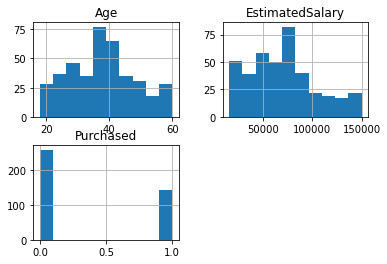

In [50]:
df.hist()

##  Since there is a Gaussian-like Distribution in 'Age' and 'EstimatedSalary', we need to do Standardization.

# Splitting the dataset into the Training set and Test set

In [51]:
y=df['Purchased']
x=df.drop(['Purchased'], axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=4)

# Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

# Fitting K-NN to the Training set

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score



In [54]:
for i in range(1,21):
  knn = KNeighborsClassifier(metric= 'manhattan',n_neighbors=i) #initialising the model
  knn.fit(x_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10))) #predicting using the model



K value  :  1  train score :  0.9964285714285714  score :  0.8857142857142858
K value  :  2  train score :  0.95  score :  0.8535714285714286
K value  :  3  train score :  0.9428571428571428  score :  0.8928571428571429
K value  :  4  train score :  0.9214285714285714  score :  0.9000000000000001
K value  :  5  train score :  0.9214285714285714  score :  0.9035714285714287
K value  :  6  train score :  0.925  score :  0.8928571428571429
K value  :  7  train score :  0.9178571428571428  score :  0.9
K value  :  8  train score :  0.9214285714285714  score :  0.8964285714285716
K value  :  9  train score :  0.925  score :  0.9107142857142858
K value  :  10  train score :  0.9178571428571428  score :  0.9035714285714287
K value  :  11  train score :  0.9214285714285714  score :  0.9178571428571429
K value  :  12  train score :  0.9178571428571428  score :  0.9107142857142858
K value  :  13  train score :  0.9142857142857143  score :  0.9107142857142858
K value  :  14  train score :  0.9142

## K=11 is the best k value according to the highest cross val score of 0.9178571428571429.
lesser the better, so we will go for K=11

In [55]:
knn = KNeighborsClassifier(metric= 'manhattan',n_neighbors=11)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9083333333333333

In [56]:
knn2 = KNeighborsClassifier(metric= 'euclidean',n_neighbors=11)
knn2.fit(x_train,y_train)
knn2.score(x_test,y_test)

0.9

##  Manhattan distance gave better result.

# Predicting the Test set results

In [58]:
from sklearn import metrics
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9083333333333333


In [59]:
#Evaluation procedure 1 - Train and test on the entire dataset
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x, y)
y_pred = knn.predict(x)
print(metrics.accuracy_score(y, y_pred))

0.8325


In [60]:
#Evaluation procedure 2 - Train/test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=4)
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.85


In [65]:

from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None) 
print(F1_score)


[0.89655172 0.72727273]


# Making the Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[78,  3],
       [15, 24]], dtype=int64)

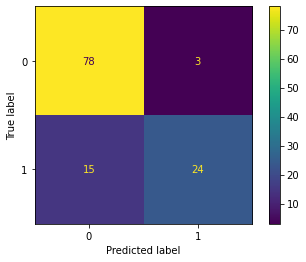

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cnf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=knn.classes_).plot()

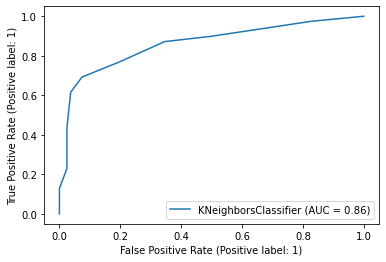

In [63]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(knn, x_test, y_test)

plt.show()